In [60]:
from tensorflow.keras.layers import Dense,Conv2D,ZeroPadding2D,BatchNormalization,MaxPooling2D,Flatten,Dropout
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import imutils
from os import listdir
from tensorflow.keras import Sequential 
import glob


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
def load_image_data(di,image_size):
    img_width,img_height=image_size
    x=[]
    y=[]
    for d in di:
        for f in glob.iglob(f'{d}/*'):
            img=cv2.imread(f)
            img=cv2.resize(img,dsize=(img_width,img_height),interpolation=cv2.INTER_CUBIC)
            img=img/255
            x.append(img)
            if d[-5:]=="Fresh":
              y.append(0)
            else:
              y.append(1)
        
    x=np.array(x)
    y=np.array(y)
    return x,y

In [63]:
arg="/content/drive/MyDrive/Meat_classify"
fresh = arg + '/Fresh' 
spoiled = arg + '/Spoiled'
x,y=load_image_data([fresh,spoiled],(256,256))


In [ ]:
np.save("/content/drive/MyDrive/Meat_classify/image.npy",x,allow_pickle=True)

In [ ]:
np.save("/content/drive/MyDrive/Meat_classify/meat_label.npy",y)

In [ ]:
y=np.load("/content/drive/MyDrive/Meat_classify/meat_label.npy",allow_pickle=True)
len(y)

1895

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_val,x_tes,y_val,y_tes=train_test_split(x_test,y_test,test_size=0.2)


In [ ]:
model=Sequential([
    ZeroPadding2D(padding=(2,2),input_shape=(256,256,3)),
    Conv2D(32,(7,7),strides=(1,1),activation="relu",),
    BatchNormalization(axis=3,),
    MaxPooling2D((4,4)),
    Conv2D(64,(7,7),strides=(1,1),activation="relu"),
    MaxPooling2D((4,4)),
    Conv2D(32,(7,7),strides=(1,1),activation="relu"),
    MaxPooling2D((4,4)),
    Flatten(),
    Dense(240,activation="relu"),
    Dense(1,activation="sigmoid",)
      
])

In [ ]:
model.compile('adam',
              loss="BinaryCrossentropy", metrics=['accuracy'])

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy')>=0.99):
            print("\n Reached the accuracy so cancelling the epoch training")
            self.model.stop_training=True
my_call=mycallback()

In [ ]:
model.fit(x_train,y_train,epochs=20,callbacks=[my_call],validation_data=[x_val,y_val])

Epoch 1/20
42/42 [==============================] - 155s 4s/step - loss: 0.2653 - accuracy: 0.8741 - val_loss: 1.0029 - val_accuracy: 0.5055
Epoch 2/20
42/42 [==============================] - 131s 3s/step - loss: 0.0735 - accuracy: 0.9683 - val_loss: 0.6817 - val_accuracy: 0.5055
Epoch 3/20
42/42 [==============================] - 131s 3s/step - loss: 0.0609 - accuracy: 0.9691 - val_loss: 0.5981 - val_accuracy: 0.5055
Epoch 4/20
42/42 [==============================] - 131s 3s/step - loss: 0.0446 - accuracy: 0.9804 - val_loss: 0.4360 - val_accuracy: 0.7692
Epoch 5/20
42/42 [==============================] - 132s 3s/step - loss: 0.0390 - accuracy: 0.9796 - val_loss: 0.2439 - val_accuracy: 0.9297
Epoch 6/20
42/42 [==============================] - 142s 3s/step - loss: 0.0382 - accuracy: 0.9857 - val_loss: 0.2355 - val_accuracy: 0.8637
Epoch 7/20
42/42 [==============================] - 130s 3s/step - loss: 0.0254 - accuracy: 0.9887 - val_loss: 0.0494 - val_accuracy: 0.9824
Epoch 8/20
42

In [ ]:
model.save("/content/drive/MyDrive/Meat_classify/meat_classify.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 260, 260, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        100416    
                                                        

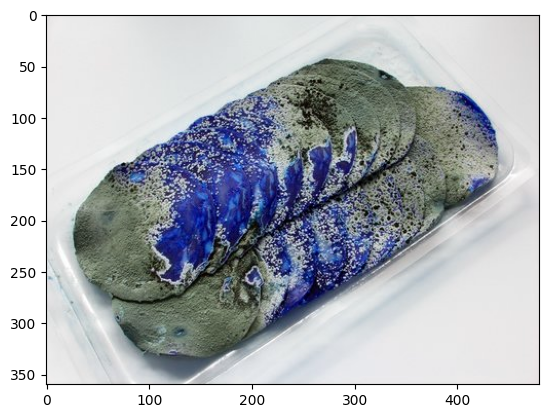

In [ ]:
a="/content/drive/MyDrive/rotten meat.jpg"
image=[]
img=cv2.imread(a)
plt.imshow(img)
img=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_CUBIC)
img=img/255
image.append(img)
image=np.array(image)

In [ ]:
pred=model.predict(image)
pred

1/1 [==============================] - 0s 44ms/step


array([[0.08588357]], dtype=float32)

In [ ]:
if pred<0.50:
  print("Spoiled meat")
else:
  print("Fresh meat")

Spoiled meat
